In [5]:
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

In [6]:
# Importing Dataset
visa = pd.read_csv('EasyVisa.csv')

In [7]:
# copying data to another variable to avoid any changes to original data
data = visa.copy()

## Data Overview

- Observations
- Sanity checks

In [9]:
# Checking top 5 rows of the data
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [10]:
# Checking last 5 rows of the data
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


* Data is loaded correctly

In [12]:
# Checking dimensions of the data
data.shape

(25480, 12)

* Dataset has 25480 rows and 12 columns

In [14]:
# Checking the data types of the columns for the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


* The dataset has a mix of object, float, and int data types
* The dependant variable (case_status) is object datatype
* No missing data in the dataset

In [16]:
# Checking for missing values
data.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

* No missing values in the dataset.

In [18]:
# Checking for duplicates 
data.duplicated().sum()

0

* Dataset has no duplicates

In [20]:
# Checking the summary of the dataset.
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.04321,22877.928848,-26.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Out of six continents, Asia has the highest number of cases, with 16,861 out of a total of 25,480.
* Bachelor's is the most frequent education level among applicants.
* More than half of the applicants have job experience, and most do not require job training.
* Some rows are showing the number of employees as negative, which doesn’t make sense. We need to look deeper into it.
* The prevailing wage ranges from approximately 2.13 to 319,210.27, with a median wage of 70,308.21. The significant difference between the minimum and maximum wages can be explained by the fact that they are calculated in different units, such as hourly and yearly
* We can also see that most applicants visas got certified rather than not.

In [22]:
# Checking the number of values in the dataset with negative numbers of employees
data.loc[data['no_of_employees']<0].shape

(33, 12)

* The dataset has 33 values indicating negative number of employees

In [24]:
# Checking the values in the dataset with negative numbers of employees
data.loc[data['no_of_employees']<0]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
245,EZYV246,Europe,Master's,N,N,-25,1980,Northeast,39452.9900,Year,Y,Certified
378,EZYV379,Asia,Bachelor's,N,Y,-11,2011,Northeast,32506.1400,Year,Y,Denied
832,EZYV833,South America,Master's,Y,N,-17,2002,South,129701.9400,Year,Y,Certified
2918,EZYV2919,Asia,Master's,Y,N,-26,2005,Midwest,112799.4600,Year,Y,Certified
6439,EZYV6440,Asia,Bachelor's,N,N,-14,2013,South,103.9700,Hour,Y,Denied
6634,EZYV6635,Asia,Bachelor's,Y,N,-26,1923,West,5247.3200,Year,Y,Denied
7224,EZYV7225,Europe,Doctorate,N,N,-25,1998,Midwest,141435.9500,Year,Y,Certified
7281,EZYV7282,Asia,High School,N,N,-14,2000,Midwest,58488.5000,Year,Y,Denied
7318,EZYV7319,Asia,Bachelor's,Y,Y,-26,2006,South,115005.6100,Year,Y,Certified
7761,EZYV7762,Asia,Master's,N,N,-11,2009,Midwest,38457.5100,Year,Y,Certified


* The negative number of employees ranges from -11 to -26. It looks like there may have been a typographical error, and we will convert them into positive numbers.

In [26]:
# Fixing the negative values in number of employees columns
data["no_of_employees"] = abs(data["no_of_employees"])

In [27]:
# Checking the number of values in the dataset with negative numbers of employees after converting them to positive values
data.loc[data['no_of_employees']<0].shape

(0, 12)

* Dataset has no more negative values in the numbers of employees coloumn

In [29]:
# Checking the count of each unique category in each of the categorical variables

# Making a list of all catrgorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)
    

EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: case_id, Length: 25480, dtype: int64
--------------------------------------------------
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
--------------------------------------------------
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
--------------------------------------------------
Y    14802
N    10678
Name: has_job_experience, dtype: int64
--------------------------------------------------
N    22525
Y     2955
Name: requires_job_training, dtype: int64
--------------------------------------------------
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, 

* All case IDs are unique values and have no significance for our analysis and model building. We can drop them.
* The continent feature has six categorical values: Asia is the most common and Oceania is the least common.
* The 'Education of Employee' feature has four categories: High School, Bachelor's, Master's, and Doctorate.
* The 'Has Job Experience' and 'Requires Job Training' features have two categories: Y and N.
* Unit of wages has four categories, Year, Hour, Week, and Month.
* The 'Full-Time Position' feature has two categories: Y and N.
* Case status has two categories, Certified and Denied.

In [31]:
# Dropping the 'case_id' column from the data.
data.drop(["case_id"], axis=1, inplace=True)

In [32]:
# Checking the dataset after the column was dropped
data.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


* The column "case_id" dropped succesfully

### Univariate Analysis

In [37]:
# Function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [38]:
# Function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top
    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        hue=feature,
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

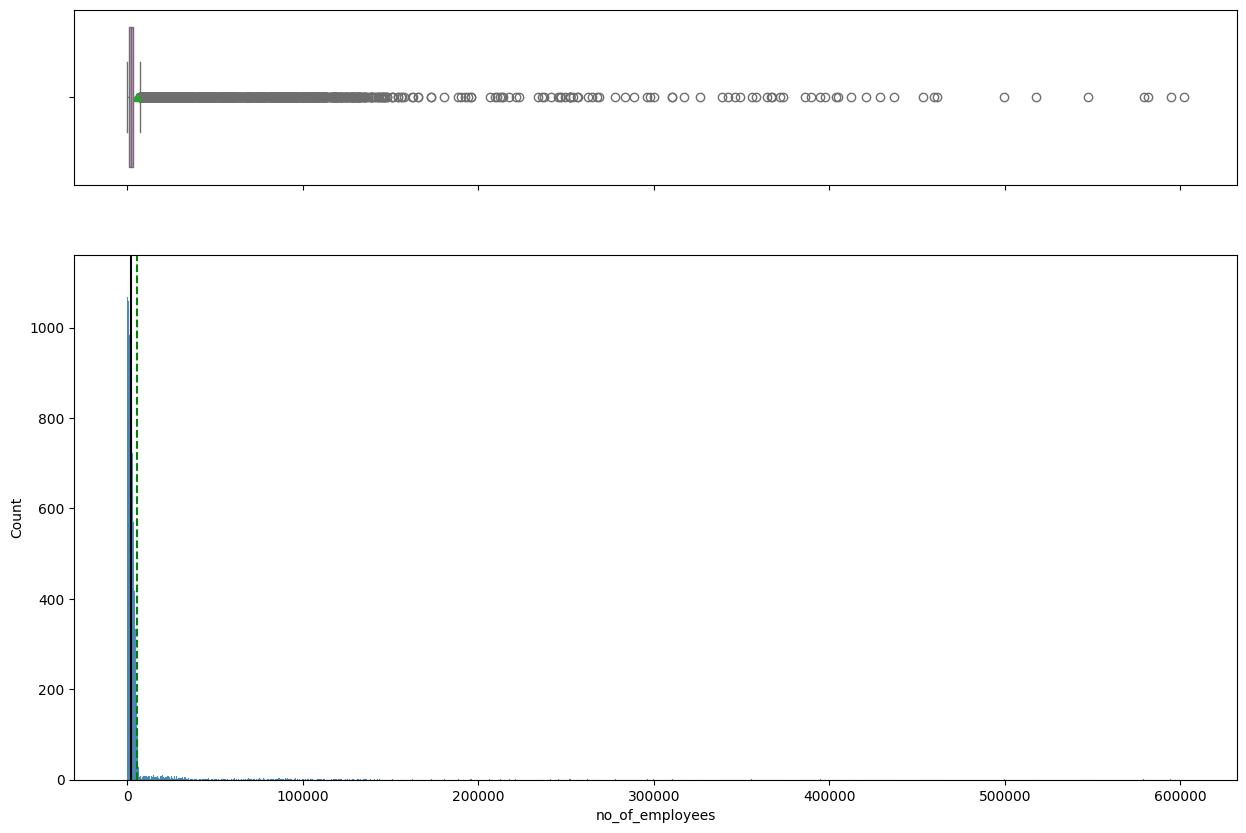

In [39]:
# Visualizing the number of employees column
histogram_boxplot(data, "no_of_employees")

* The "number of employees" values are heavily right-skewed. Many outliers are present on the right side of the whisker. However, we are not going to treat them, as these might represent large corporations with many employees.

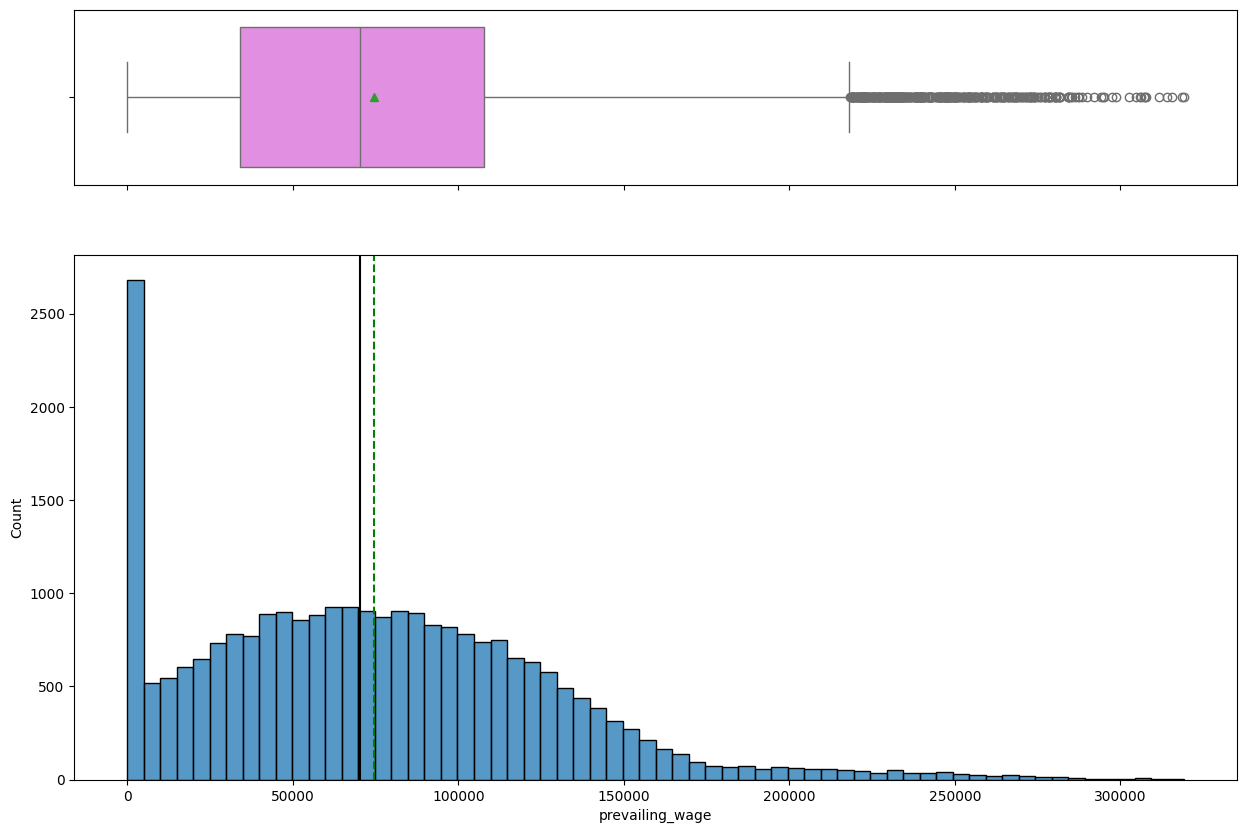

In [41]:
# Visualizing the prevailing wage column.
histogram_boxplot(data, "prevailing_wage")

* The prevailing wage bar plot shows a median wage of approximately $70,000, with many outliers on the right side of the whisker.
* The prevailing wage histogram indicates that many values in the dataset are very small numbers; this might be because some wages are shown in different units, such as hourly. We need to look deeper into it. 

In [43]:
# Checking the values that have less than 100 prevailing wage
data.loc[data["prevailing_wage"] < 100]

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
338,Asia,Bachelor's,Y,N,2114,2012,Northeast,15.7716,Hour,Y,Certified
634,Asia,Master's,N,N,834,1977,Northeast,3.3188,Hour,Y,Denied
839,Asia,High School,Y,N,4537,1999,West,61.1329,Hour,Y,Denied
876,South America,Bachelor's,Y,N,731,2004,Northeast,82.0029,Hour,Y,Denied
995,Asia,Master's,N,N,302,2000,South,47.4872,Hour,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...
25023,Asia,Bachelor's,N,Y,3200,1994,South,94.1546,Hour,Y,Denied
25258,Asia,Bachelor's,Y,N,3659,1997,South,79.1099,Hour,Y,Denied
25308,North America,Master's,N,N,82953,1977,Northeast,42.7705,Hour,Y,Denied
25329,Africa,Bachelor's,N,N,2172,1993,Northeast,32.9286,Hour,Y,Denied


In [44]:
# Checking the count of the values in the prevailing wage column
data.loc[data["prevailing_wage"] < 100, "unit_of_wage"].count()

176

* The Dataset contains 176 values with a prevailing wage of less the 100

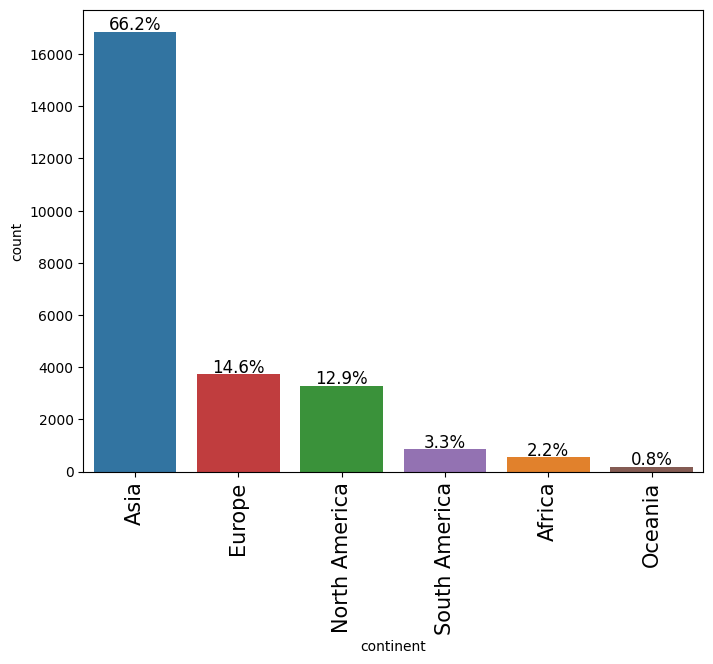

In [46]:
 # Visualizing barplot for continent in percentage
labeled_barplot(data, "continent", perc=True)

* From the visualization above, we can see that the vast majority of applicants are from Asia, followed by Europe. The fewest applicants are from Oceania.

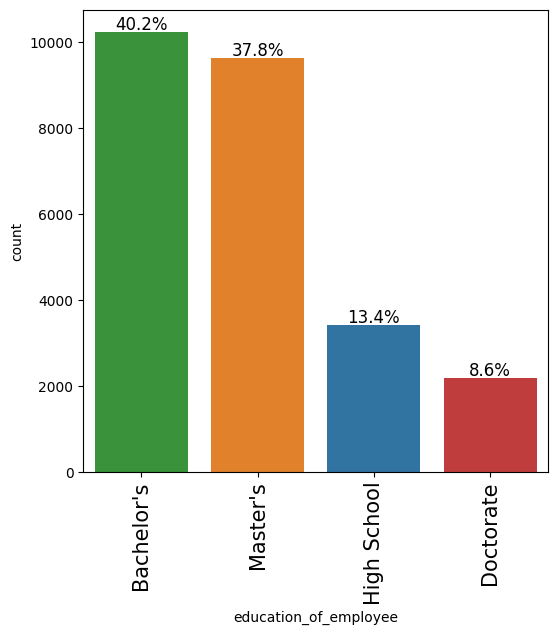

In [48]:
# Visualizing barplot for education of employee in percentage
labeled_barplot(data, "education_of_employee", perc=True)

* From the visualisation above we can see that most applicants have either Bachelors or Masters degree. 8.6 percent of applicants have Doctorate degree.

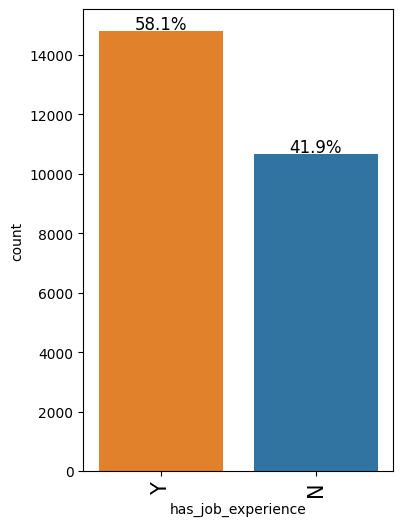

In [50]:
# Visualizing barplot for job experience in percentage
labeled_barplot(data, "has_job_experience", perc=True)

* 58% of applicants have job experience, and almost 42% of aplicants have no job expiriance.

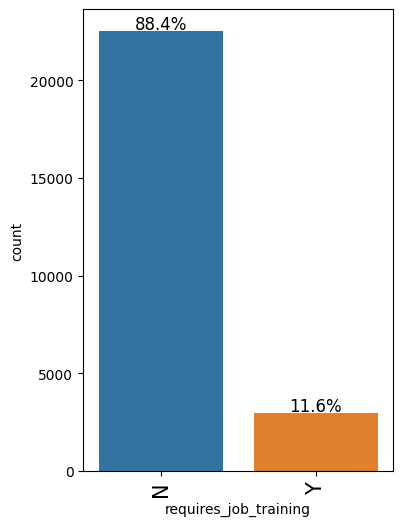

In [52]:
# Visualizing barplot for requires job training column in percentage
labeled_barplot(data, "requires_job_training", perc=True)

* From the visualisation above we can see that 88% of applicants does not reqire job trainig, and 11% reqire job training

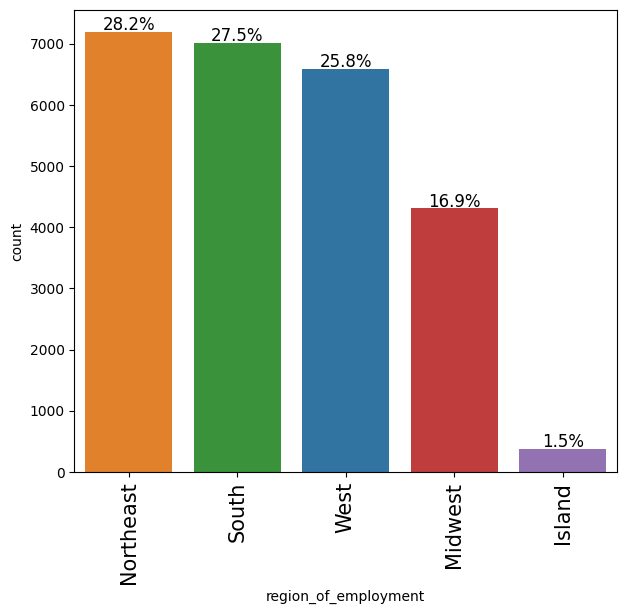

In [54]:
# Visualizing barplot for region of employment in percentage
labeled_barplot(data, "region_of_employment", perc=True)

* From the visualization above, we can see that the Northeast, South, and West are very close in terms of employment region, each comprising between 25 and 28 percent. The Midwest is almost 17% of applicants, while the least popular is the Island Region with only 1.5%.

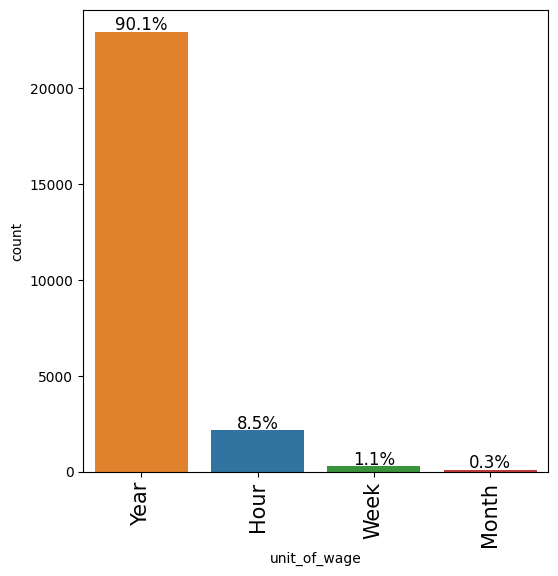

In [56]:
# Visualizing barplot for unit of wage in percentage
labeled_barplot(data, "unit_of_wage", perc=True)

* From the visualization above, we can see that most applicants' wages are represented as yearly amounts. But some ate represented as Hourly, Weekly or Monthly. 

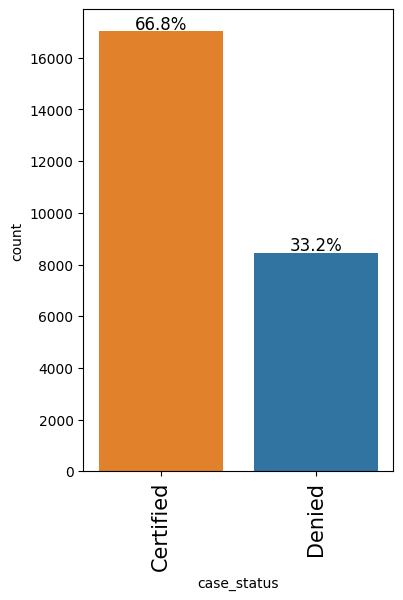

In [58]:
# Visualizing the bar plot for case status as percentages
labeled_barplot(data, "case_status", perc=True)

* From the visualization above, we can see that 66.8% of applicants were certified for a visa, while 33.2% were denied a visa.

### Bivariate Analysis

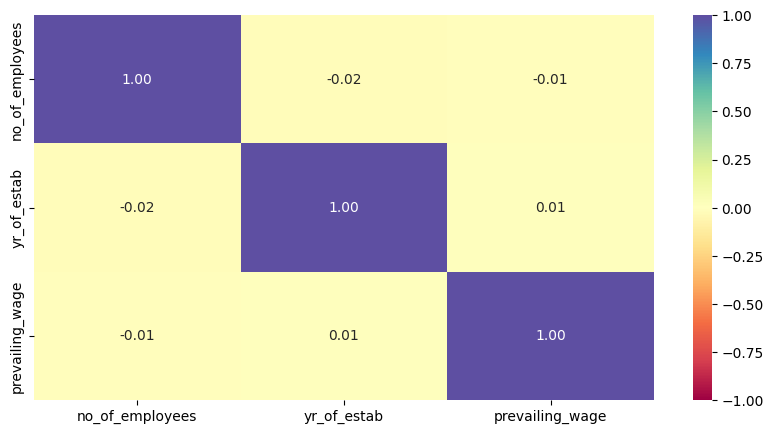

In [61]:
# Creating a list of numerical columns
cols_list = data.select_dtypes(include=np.number).columns.tolist()
# Creating a heatmap to check the correlation between different columns.
plt.figure(figsize=(10, 5))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* The correlation map is not very informative. Let's look into other visualizations to gain more insights. 

In [63]:
# This function visualizes a predictor's distribution and its relationship to a target variable.


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [64]:
# This function plots a stacked bar chart of a predictor against a target variable.
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()



case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


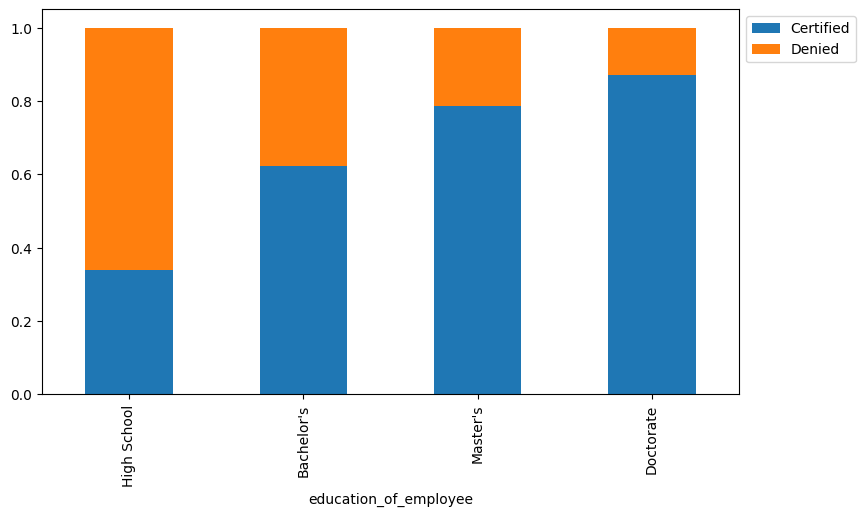

In [65]:
# Visualizing the relationship between the education of employees and case status.
stacked_barplot(data, "education_of_employee", "case_status")

* As we can see from the visualization above, the higher the level of education of the applicant, the more likely the visa is to be certified.
* Let's look into the relationship between education and region of employment.

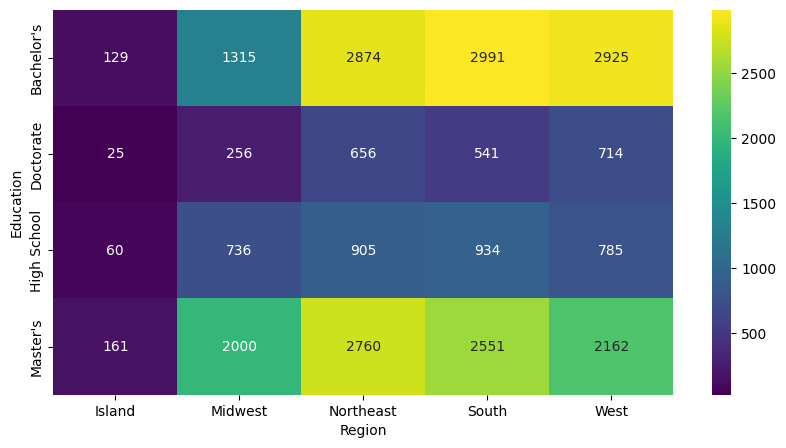

In [67]:
# Visualizing the relationship between education and region of employment.
plt.figure(figsize=(10, 5))
sns.heatmap(pd.crosstab(data['education_of_employee'], data['region_of_employment']),
    annot=True,
    fmt="g",
    cmap="viridis"
)

plt.ylabel("Education")
plt.xlabel("Region")
plt.show()

* The heatmap above shows that the most popular region for employment is the West for those with a Doctorate degree, the Northeast for those with a Master's, and nearly equal distribution among the West, South, and Northeast for those with a Bachelor's degree. For individuals with a High School education, the South is the most popular region.

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


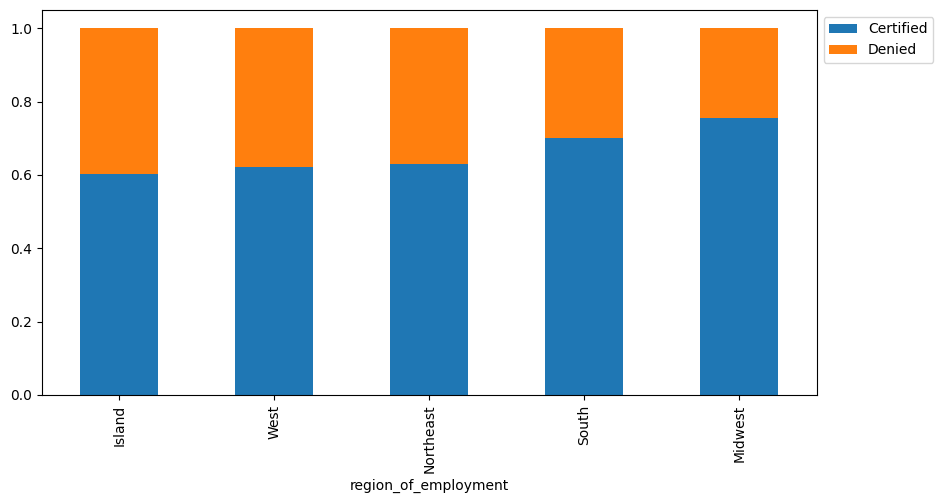

In [69]:
# Visualizing the relationship between the region of employment and case status.
stacked_barplot(data, "region_of_employment", "case_status")

* As we can see from the visualization above, the Midwest and South regions have lower denial rates, while the other regions have almost equal denial rates.
* Let's check denial rates for different continents. 

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


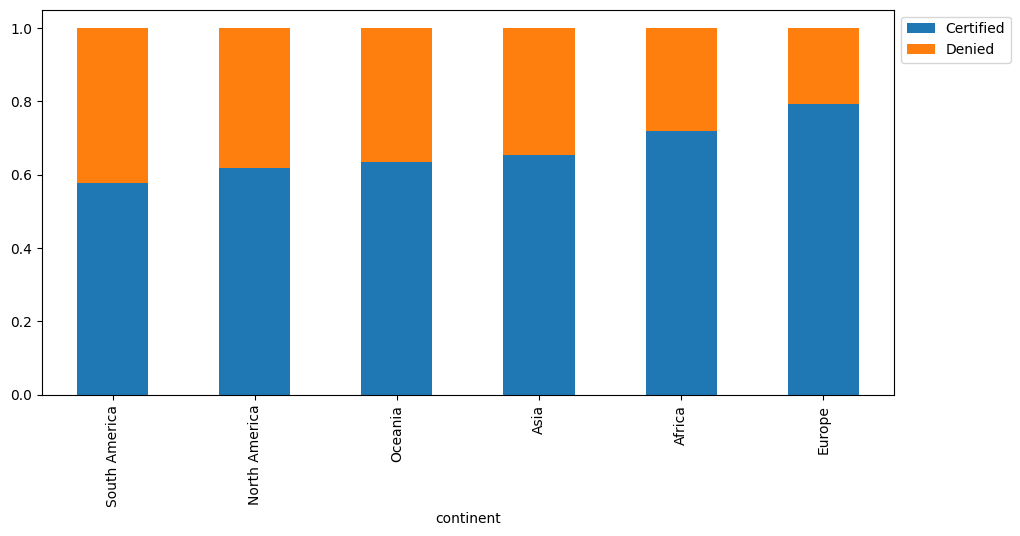

In [71]:
# Visualizing the relationship between the region of employment and case status.
stacked_barplot(data, "continent", "case_status")

* From the visualization above, we can see that Europe has the lowest denial rates and South America has the highest Denial rates.

* Let's check how work experience influence visa certification

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


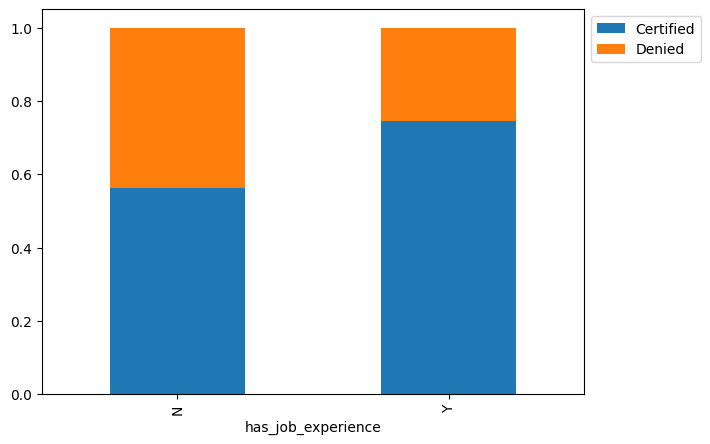

In [74]:
# Visualizing the relationship between the job expirience and case status.
stacked_barplot(data, "has_job_experience", "case_status")

* The visa certification rate is higher among those with job experience compared to those with no job experience.

* Let's check if employees with prior work experience require job trining.

requires_job_training      N     Y    All
has_job_experience                       
All                    22525  2955  25480
N                       8988  1690  10678
Y                      13537  1265  14802
------------------------------------------------------------------------------------------------------------------------


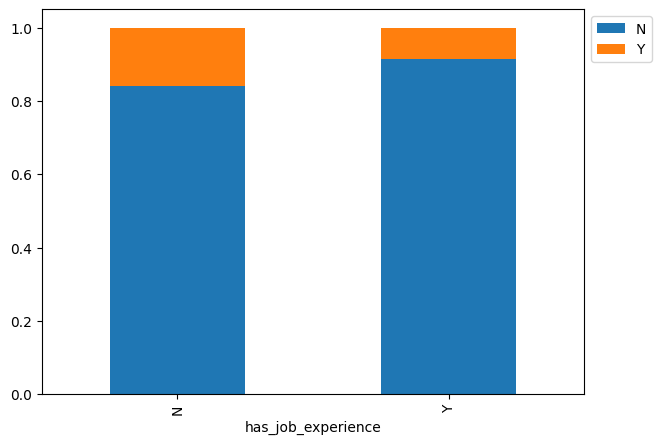

In [77]:
# Visualizing the relationship between the job expirience and case status.
stacked_barplot(data, "has_job_experience", "requires_job_training")

* Employees with prior job experience are less likely to require job training compared to those who have no prior work experience.

* Let's check the prevailing wage in relation to case status.

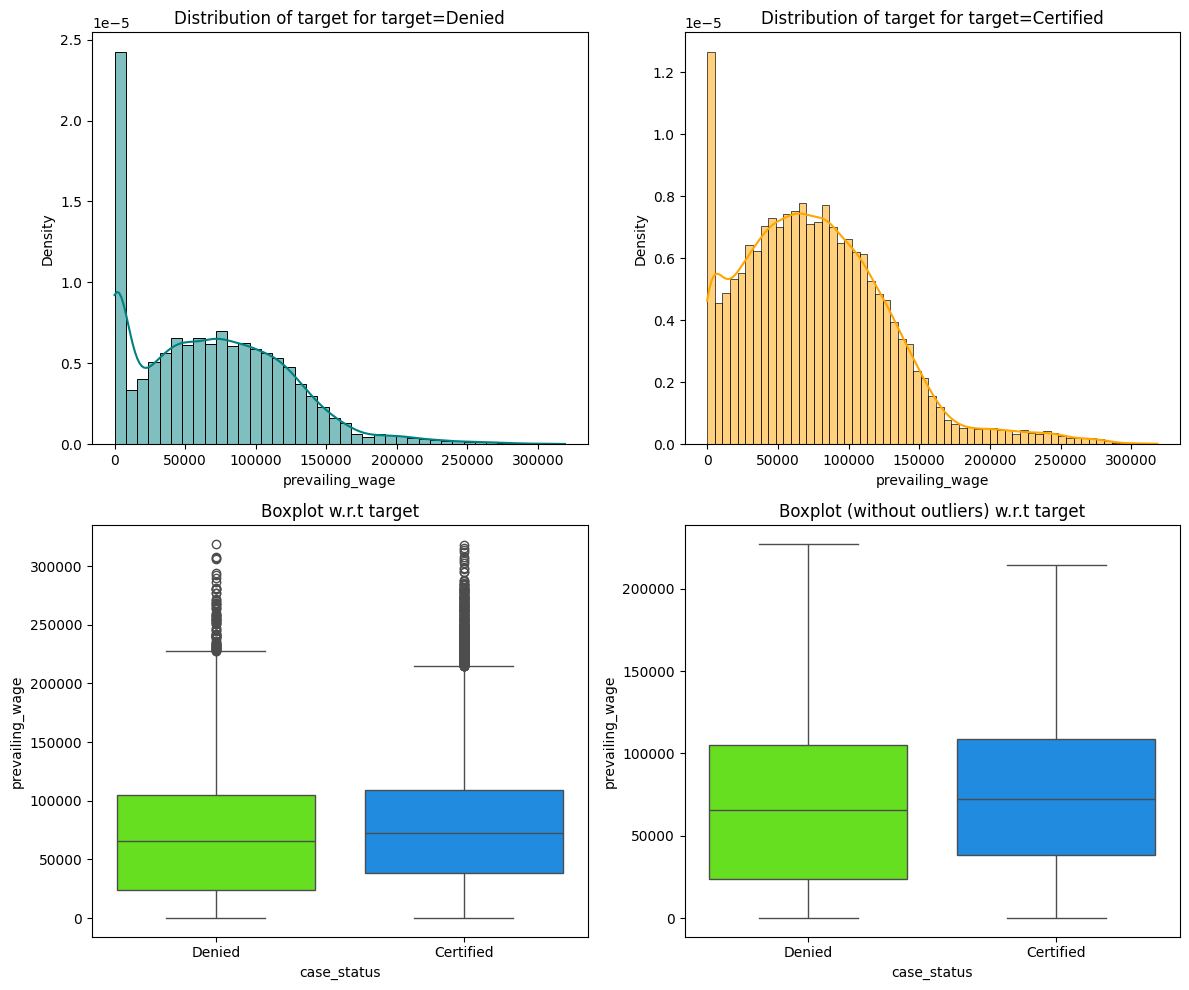

In [80]:
# Visualizing prevailing wage in relation to case status.
distribution_plot_wrt_target(data, 'prevailing_wage', 'case_status')

* There is no sagnificant difference in Prewiling wage for certified or denied employees.

* Let's check how prevailing wage looks across different regions. 

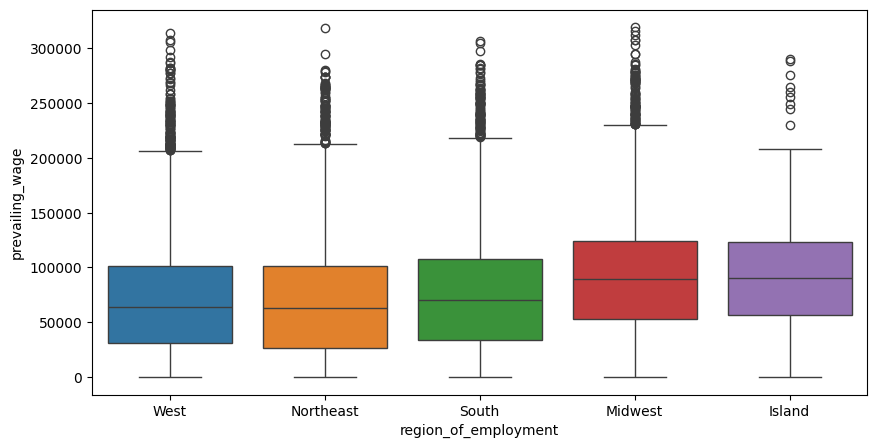

In [83]:
# Visualizing the distribution of prevailing wages across different regions of employment with a boxplot.
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x='region_of_employment', y='prevailing_wage', hue='region_of_employment')
plt.show()

* The median prevailing wages in the Midwest and Island regions are slightly higher than in the other regions.

* Let's check if units of wages have any impact on the case status

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


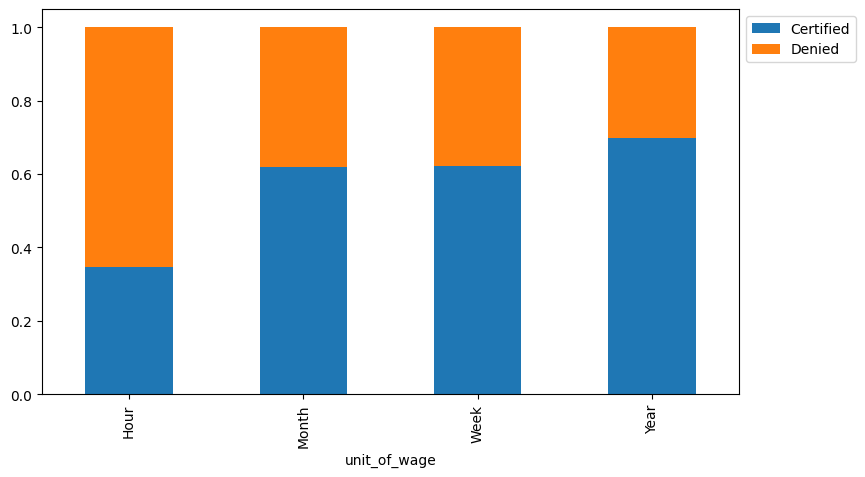

In [86]:
# Visualizing the relationship between the job expirience and case status.
stacked_barplot(data, "unit_of_wage", "case_status")

* From the visualization above, we can see that cases with hourly wage units have significantly worse chances of getting a visa certified compared to other wage units.

### Data Preprocessing

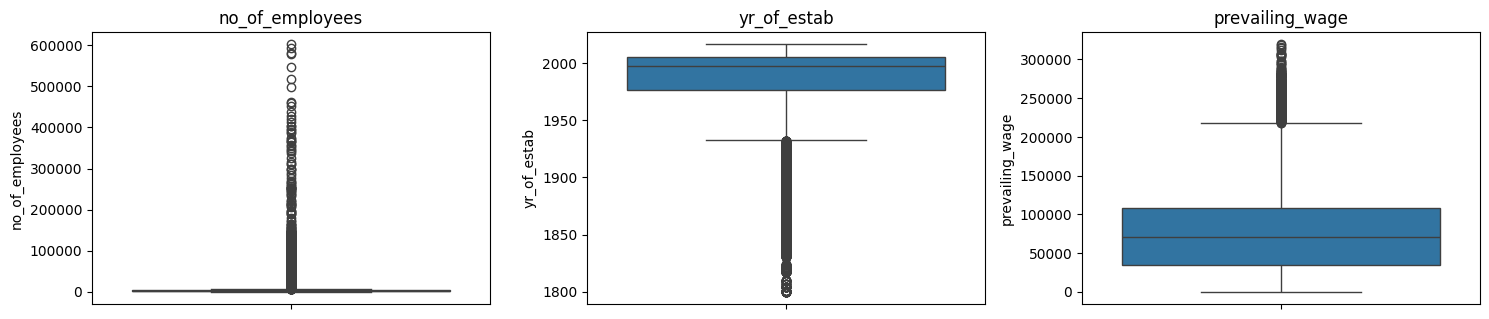

In [89]:
# Outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=data, y=variable)
    plt.title(variable)
    plt.tight_layout()

plt.show()

* There are many outliers in the dataset, however, we will not treat them as they look realistic.

* Let's prepare date for modeling

In [92]:
# Converting the categorical values in the "case_status" into numerical values for model.
data["case_status"] = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

In [93]:
# # Splitting data into predictors (X) and target (Y)
X = data.drop(columns=["case_status"])
Y = data["case_status"]
# Creating dummies for X
X = pd.get_dummies(X)  

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1, stratify=Y)  # Split data into train and test in the ratio 70:30

In [94]:
# Printing the shapes of the training and test sets and displaying the class distribution percentages.
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 28)
Shape of test set :  (7644, 28)
Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64


* The training and testing sets are split almost equally. We can move on to model building.

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [97]:
data

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,0
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,1
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,0
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,0
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,1
...,...,...,...,...,...,...,...,...,...,...,...
25475,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,1
25476,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,1
25477,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,1
25478,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,1


* Dataset looks ready for next step.

## Building bagging and boosting models

##### In our model building, we will prioritize the F1 score as both false negatives and false positives are equally important for our problem.

In [101]:
# Defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [102]:
# Defining a function to plots a confusion matrix with percentages for a given model

def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Decision Tree Model

In [104]:
# Training a decision tree classifier on the training data
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

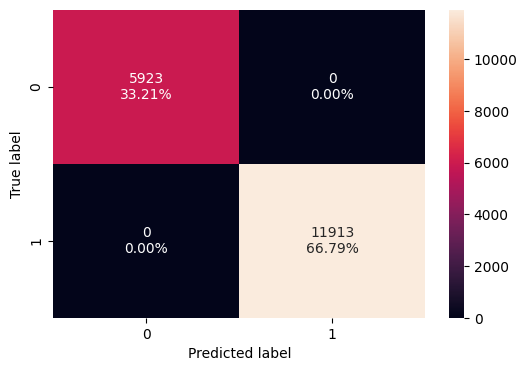

In [105]:
# Plotting confusion matrix for train data
confusion_matrix_sklearn(model, X_train, y_train) 

In [106]:
# Checking performance on train data
decision_tree_perf_train = model_performance_classification_sklearn(model, X_train, y_train)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


* The decision tree explained all of the data perfectly, indicating overfitting.

* Let's check the model on test data.

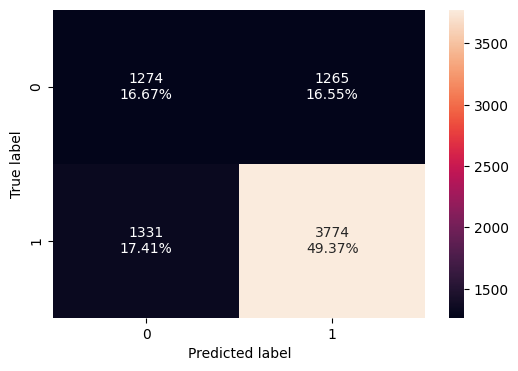

In [109]:
# Plotting confusion matrix for test data
confusion_matrix_sklearn(model, X_test, y_test) 

In [110]:
# Checking performance on test data
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.660387,0.739275,0.748958,0.744085


* The performance on the test data is significantly worse, confirming that the model is overfitting.

* Let's try tuning hyperparameters to improve the model.

In [113]:
# Choosing the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator=dtree_estimator, param_grid=param_grid, scoring=scorer, n_jobs=-1) ## Complete the code to run grid search with n_jobs = -1

grid_obj = grid_obj.fit(X_train, y_train) ## Complete the code to fit the grid_obj on the train data

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=10,
                       min_impurity_decrease=0.0001, random_state=1)

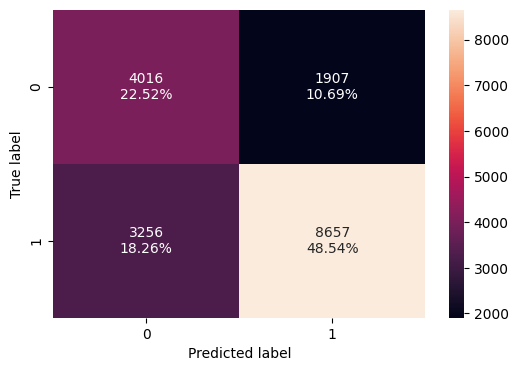

In [114]:
# Plotting confusion matrix for Decision Tree after model tuned on train data
confusion_matrix_sklearn(dtree_estimator,X_train,y_train)

In [115]:
# Calculating different model metrics for train data
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator,X_train,y_train)
dtree_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.710529,0.726685,0.819481,0.770299


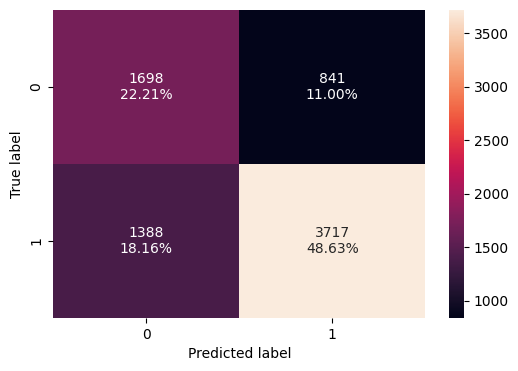

In [116]:
# Plotting confusion matrix for Decision Tree after model tuned on test data
confusion_matrix_sklearn(dtree_estimator,X_test,y_test)

In [117]:
# Calculating different metrics for test data
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator,X_test,y_test)
dtree_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.708399,0.72811,0.815489,0.769326


* Overfitting has been reduced, and the F1 score has also improved.

### Bagging Classifier

In [120]:
# Training Bagging Classifier on the training data
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train, y_train)

BaggingClassifier(random_state=1)

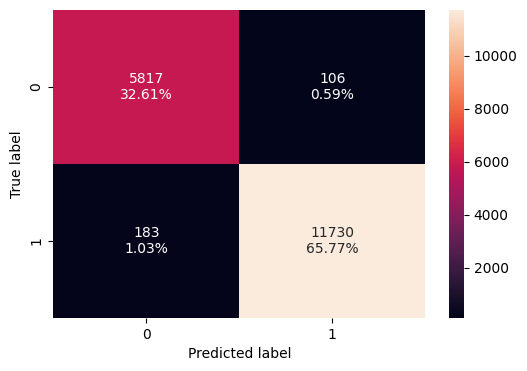

In [121]:
# Plotting confusion matrix for Bagging Classifier train data
confusion_matrix_sklearn(bagging_classifier, X_train, y_train)

In [122]:
bagging_classifier_model_train_perf = model_performance_classification_sklearn(bagging_classifier, X_train, y_train)
bagging_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.983797,0.984639,0.991044,0.987831


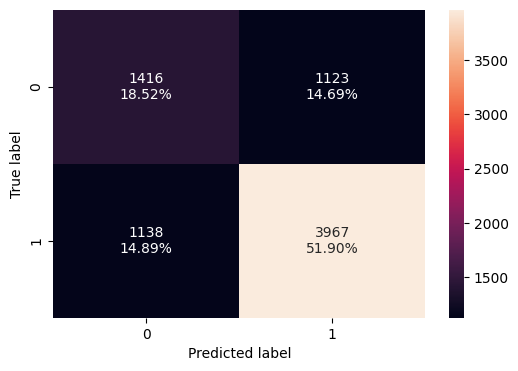

In [123]:
# Plotting confusion matrix for Bagging Classifier test data
confusion_matrix_sklearn(bagging_classifier, X_test, y_test)

In [124]:
# Checking Bagging Classifier model performance metrics for test data
bagging_classifier_model_test_perf = model_performance_classification_sklearn(bagging_classifier, X_test, y_test) ## Complete the code to check performance for test data
bagging_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.704212,0.777081,0.779371,0.778225


* The Bagging Classifier's performance is much worse on the test data compared to the training data, indicating that it is overfitting.
* Let's try hyperparameter tuning and see if the model performance improves.

In [126]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9],
              'n_estimators' : [30,50,70],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.8, n_estimators=70,
                  random_state=1)

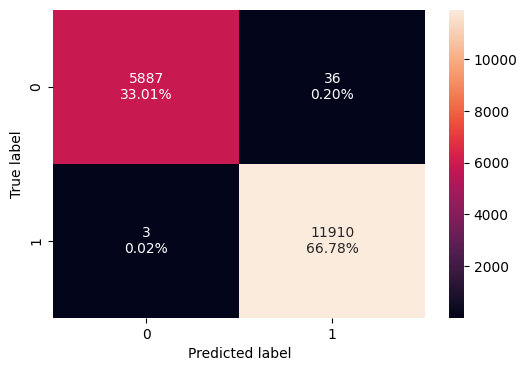

In [127]:
# Plotting confusion matrix for tuned Bagging Classifier training data
confusion_matrix_sklearn(bagging_estimator_tuned, X_train, y_train)

In [128]:
# Checking performance for tuned Bagging Classifier on train data
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(bagging_estimator_tuned, X_train, y_train)
bagging_estimator_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.997813,0.999748,0.996986,0.998365


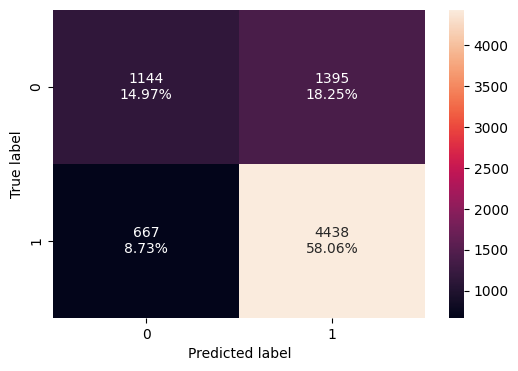

In [129]:
# Plotting confusion matrix for tuned Bagging Classifier test data
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test)

In [130]:
# Checking performance for tuned Bagging Classifier on test data
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn(bagging_estimator_tuned, X_test, y_test)
bagging_estimator_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.730246,0.869344,0.760843,0.811483


* Model performance has increased, but it is still overfitting the data even after tuning.

### Random Forest

In [133]:
# Fitting the Random Forest model
rf_estimator = RandomForestClassifier(random_state=1, class_weight='balanced')
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

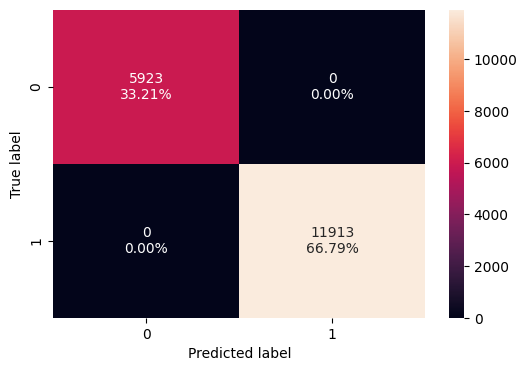

In [134]:
# Plotting confusion matrix for Random Forest train data
confusion_matrix_sklearn(rf_estimator, X_train, y_train)

In [135]:
# Checking performance for Random Forest on train data
rf_estimator_model_train_perf = model_performance_classification_sklearn(rf_estimator, X_train, y_train)
rf_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


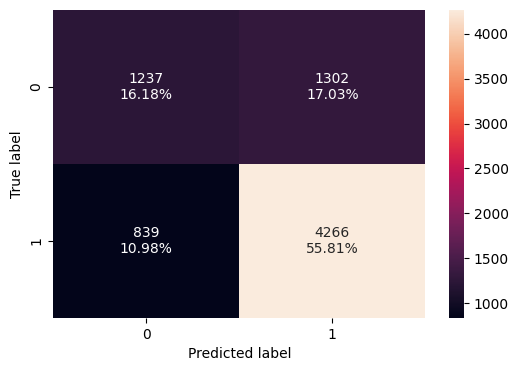

In [136]:
# Plotting confusion matrix for Random Forest on test data
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

In [137]:
# Checking performance for Random Forest on test data
rf_estimator_model_test_perf = model_performance_classification_sklearn(rf_estimator, X_test, y_test)
rf_estimator_model_test_perf


,Accuracy,Recall,Precision,F1
0,0.719911,0.835651,0.766164,0.7994


* The Random Forest model is overfitting the data
* Let's try hyperparameter tuning and see if the model performance improves.

In [139]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.18,1:0.82},random_state=1,oob_score=True,bootstrap=True)

parameters = {  
                'max_depth': list(np.arange(5,30,5)) + [None],
                'max_features': [np.arange(0.3, 0.6, 0.1),'sqrt'],
                'min_samples_leaf': np.arange(1, 4),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': [50,110,25],
                'max_samples': np.arange(0.4, 0.7, 0.1)}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.18, 1: 0.82}, max_samples=0.4,
                       min_samples_leaf=2, n_estimators=50, oob_score=True,
                       random_state=1)

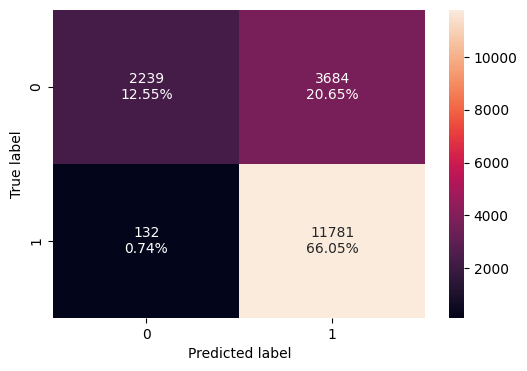

In [140]:
# Plotting confusion matrix for tuned Random Forest on train data
confusion_matrix_sklearn(rf_tuned, X_train, y_train)

In [141]:
# Checking performance for tuned Random Forest on train data
rf_tuned_model_train_perf = model_performance_classification_sklearn(rf_tuned, X_train, y_train)
rf_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.786051,0.98892,0.761785,0.860618


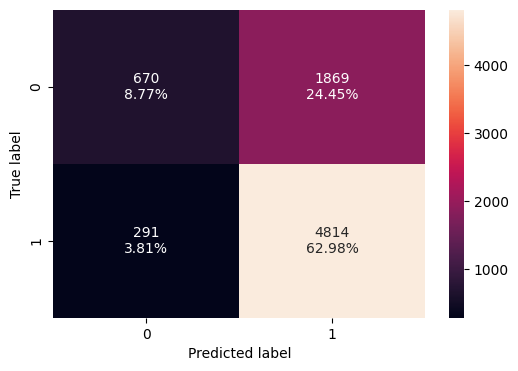

In [142]:
# Plotting confusion matrix for tuned Random Forest on test data
confusion_matrix_sklearn(rf_tuned, X_test, y_test)

In [143]:
# Checking performance for tuned Random Forest test data
rf_tuned_model_test_perf = model_performance_classification_sklearn(rf_tuned, X_test, y_test)
rf_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.717425,0.942997,0.720335,0.816763


* After tuning the model, it is almost not overfitting the data.
* Model performance has increased after tuning.

### AdaBoost Classifier

In [146]:
# Fitting the AdaBoost Classifier
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

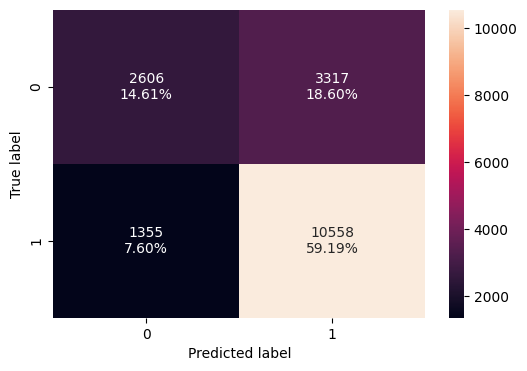

In [147]:
# Plotting confusion matrix for AdaBoost Classifier on train data
confusion_matrix_sklearn(ab_classifier, X_train, y_train)

In [148]:
# Checking performance of AdaBoost Classifier on train data
ab_classifier_model_train_perf = model_performance_classification_sklearn(ab_classifier, X_train, y_train)
ab_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.738058,0.886259,0.760937,0.81883


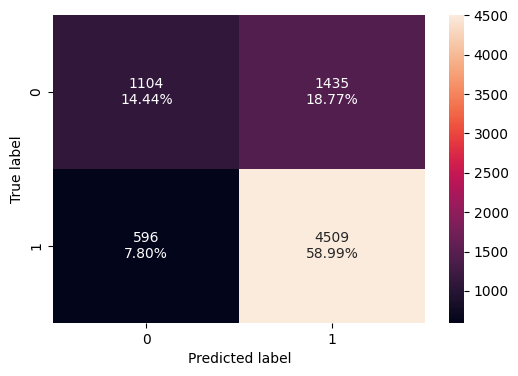

In [149]:
# Plotting confusion matrix for AdaBoost Classifier on test data
confusion_matrix_sklearn(ab_classifier, X_test, y_test)

In [150]:
# Checking performance of AdaBoost Classifier on test data
ab_classifier_model_test_perf = model_performance_classification_sklearn(ab_classifier, X_test, y_test)
ab_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.734301,0.883252,0.75858,0.816182


* The model is not overfitting the data, as it shows very similar performance metrics for training and test data.
* Let's try hyperparameter tuning and see if the model performance improves.

In [152]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.05, n_estimators=100, random_state=1)

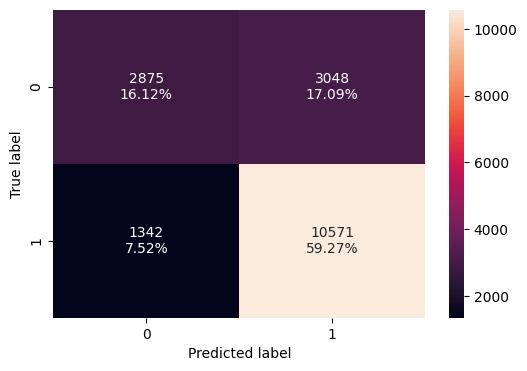

In [153]:
# Plotting confusion matrix for tuned AdaBoost Classifier on train data
confusion_matrix_sklearn(abc_tuned, X_train, y_train)

In [154]:
# Checking performance of tuned AdaBoost Classifier on train data
abc_tuned_model_train_perf = model_performance_classification_sklearn(abc_tuned, X_train, y_train)
abc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.753869,0.88735,0.776195,0.828059


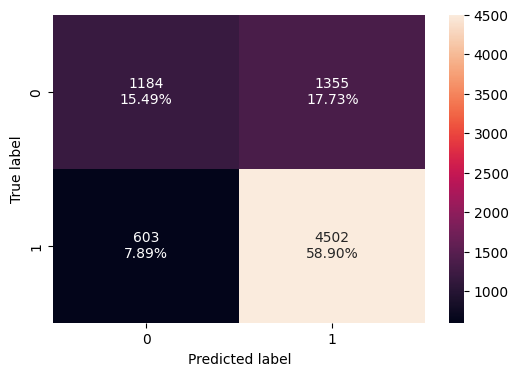

In [155]:
# Plotting confusion matrix for tuned AdaBoost Classifier on test data
confusion_matrix_sklearn(abc_tuned, X_test, y_test)

In [156]:
# Checking performance of tuned AdaBoost Classifier on test data
abc_tuned_model_test_perf = model_performance_classification_sklearn(abc_tuned, X_test, y_test)
abc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.743851,0.881881,0.768653,0.821383


* The model performance has increased slightly after tuning

### Gradient Boosting Classifier

In [159]:
# Fitting the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

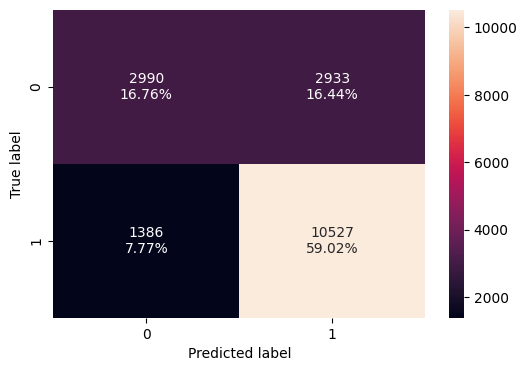

In [160]:
# Plotting confusion matrix for Gradient Boosting Classifier on train data
confusion_matrix_sklearn(gb_classifier, X_train, y_train)

In [161]:
# Checking performance of Gradient Boosting Classifier on train data
gb_classifier_model_train_perf = model_performance_classification_sklearn(gb_classifier, X_train, y_train)
gb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.757849,0.883657,0.782095,0.82978


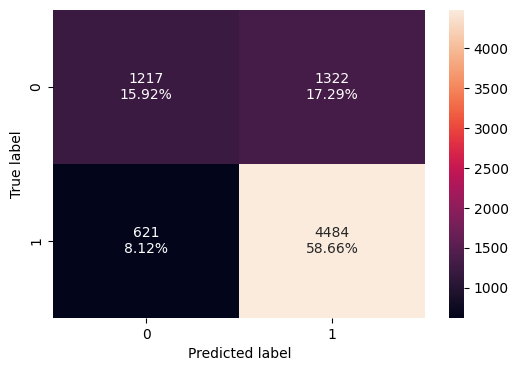

In [162]:
# Plotting confusion matrix for Gradient Boosting Classifier on test data
confusion_matrix_sklearn(gb_classifier, X_test, y_test)

In [163]:
# Checking performance of Gradient Boosting Classifier on test data
gb_classifier_model_test_perf = model_performance_classification_sklearn(gb_classifier, X_test, y_test)
gb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.745814,0.878355,0.772305,0.821923


* The model is not overfitting the data, as it shows very similar performance metrics for training and test data.
* Let's try hyperparameter tuning and see if the model performance improves.

In [165]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, n_estimators=50, random_state=1,
                           subsample=0.9)

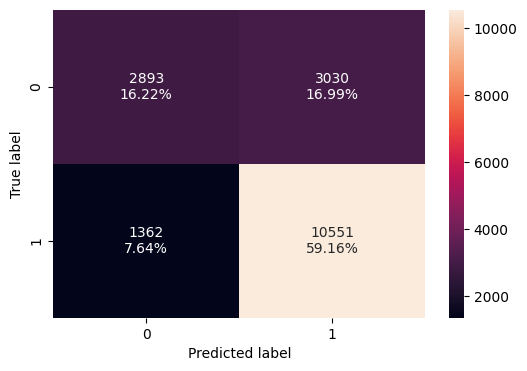

In [166]:
# Plotting confusion matrix for tuned Gradient Boosting Classifier on train data
confusion_matrix_sklearn(gbc_tuned, X_train, y_train)

In [167]:
# Checking performance of tuned Gradient Boosting Classifier on train data
gbc_tuned_model_train_perf = model_performance_classification_sklearn(gbc_tuned, X_train, y_train)
gbc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.753756,0.885671,0.776894,0.827724


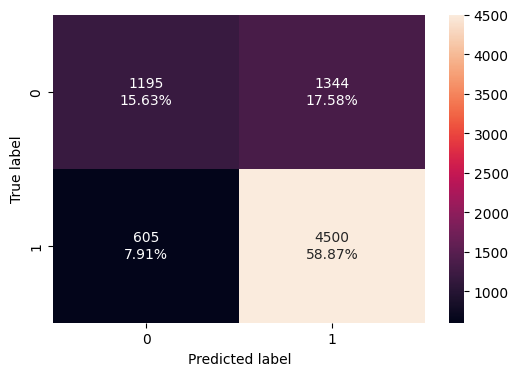

In [168]:
# Plotting confusion matrix for tuned Gradient Boosting Classifier on test data
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)

In [169]:
# Checking performance of tuned Gradient Boosting Classifier on test data
gbc_tuned_model_test_perf = model_performance_classification_sklearn(gbc_tuned, X_test, y_test)
gbc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.745029,0.881489,0.770021,0.821993


* The model performance is almost the same after tuning.

### XGBoost Classifier

In [172]:
# Fitting the XGBoost Classifier
xgb_classifier = XGBClassifier(random_state=1, eval_metric="logloss")
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

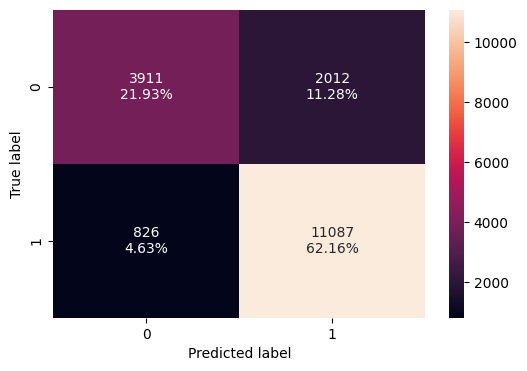

In [173]:
# Plotting confusion matrix for XGBoost Classifier on train data
confusion_matrix_sklearn(xgb_classifier, X_train, y_train)

In [174]:
# Checking performance of XGBoost Classifier on train data
xgb_classifier_model_train_perf = model_performance_classification_sklearn(xgb_classifier, X_train, y_train)
xgb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.840884,0.930664,0.8464,0.886534


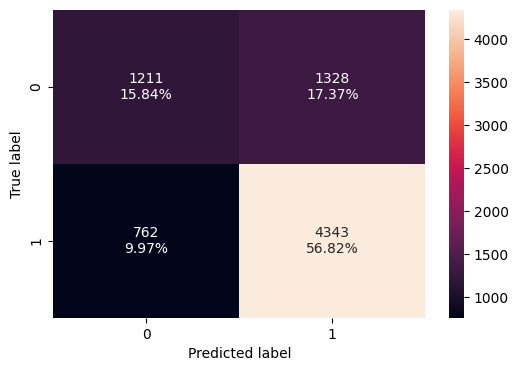

In [175]:
# Plotting confusion matrix for XGBoost Classifier on test data
confusion_matrix_sklearn(xgb_classifier, X_test, y_test)

In [176]:
# Checking performance of XGBoost Classifier on test data
xgb_classifier_model_test_perf = model_performance_classification_sklearn(xgb_classifier, X_test, y_test)
xgb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.726583,0.850735,0.765826,0.80605


* The model performance parameters show better metrics on the training data than on the test data.
* Let's tune the model with hyperparameters and see if we can improve its performance.

In [178]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

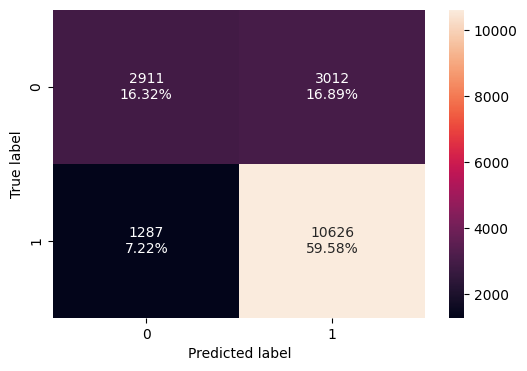

In [179]:
# Plotting confusion matrix for tuned XGBoost Classifier on train data
confusion_matrix_sklearn(xgb_tuned, X_train, y_train)

In [180]:
# Checking performance of tuned XGBoost Classifier on train data
xgb_tuned_model_train_perf = model_performance_classification_sklearn(xgb_tuned, X_train, y_train)
xgb_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.758971,0.891967,0.779147,0.831748


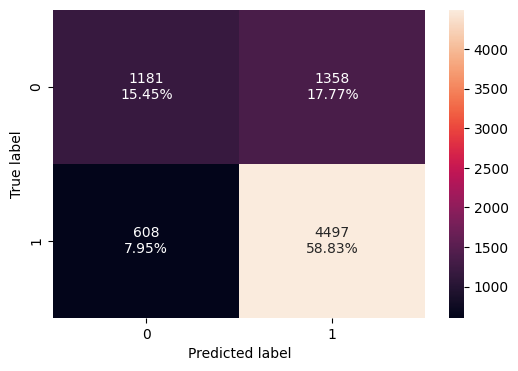

In [181]:
# Plotting confusion matrix for tuned XGBoost Classifier on test data
confusion_matrix_sklearn(xgb_tuned, X_test, y_test)

In [182]:
# Checking performance of tuned XGBoost Classifier on test data
xgb_tuned_model_test_perf = model_performance_classification_sklearn(xgb_tuned, X_test, y_test)
xgb_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.742805,0.880901,0.768061,0.82062


* Hyperparameter tuning fixed overfitting and slightly improved model performance.

### Stacking Classifier

StackingClassifier(estimators=[('AdaBoost', AdaBoostClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.7,
                                                           n_estimators=50,
                                                           random_state=1,
                                                           subsample=0.9)),
                               ('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.18,
                                                                     1: 0.82},
                                                       max_samples=0.4,
                                                       min_samples_leaf=2,
                                                       n_estimators=50,
                                                       o...
                                                 feature_types=None, gamma=3,
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.05,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=50, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=1, ...))

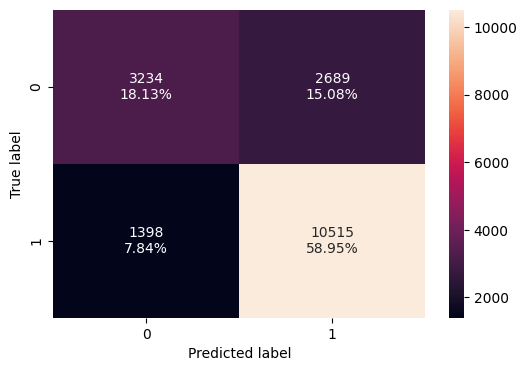

In [186]:
# Plotting confusion matrix for Stacking Classifier on train data
confusion_matrix_sklearn(stacking_classifier, X_train, y_train)

In [187]:
# Checking performance of Stacking Classifier on train data
stacking_classifier_model_train_perf = model_performance_classification_sklearn(stacking_classifier, X_train, y_train)
stacking_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.770857,0.882649,0.79635,0.837282


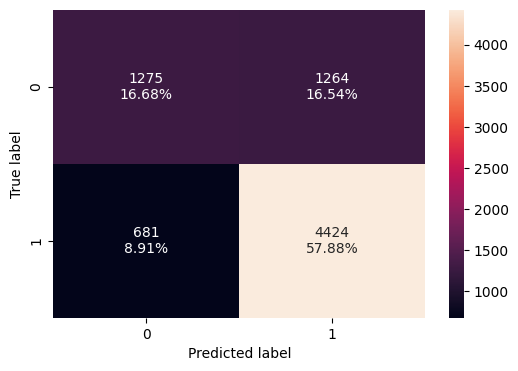

In [188]:
# Plotting confusion matrix for Stacking Classifier on test data
confusion_matrix_sklearn(stacking_classifier, X_test, y_test)

In [189]:
# Checking performance of Stacking Classifier on test data
stacking_classifier_model_test_perf = model_performance_classification_sklearn(stacking_classifier, X_test, y_test)
stacking_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.745552,0.866601,0.777778,0.819791


* The model has decent performance but shows signs of some overfitting.
* The confusion matrix shows that the model can predict false negatives better than false positives..

* Models tuned with hyperparameters generally show better performance.

## Model Performance Comparison and Conclusions

In [195]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        dtree_estimator_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.710529,0.983797,0.997813,1.0,0.786051,0.738058,0.753869,0.757849,0.753756,0.840884,0.758971,0.770857
Recall,1.0,0.726685,0.984639,0.999748,1.0,0.988920,0.886259,0.887350,0.883657,0.885671,0.930664,0.891967,0.882649
Precision,1.0,0.819481,0.991044,0.996986,1.0,0.761785,0.760937,0.776195,0.782095,0.776894,0.846400,0.779147,0.796350
F1,1.0,0.770299,0.987831,0.998365,1.0,0.860618,0.818830,0.828059,0.829780,0.827724,0.886534,0.831748,0.837282


In [196]:
# Testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        dtree_estimator_model_test_perf.T,
        bagging_classifier_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_classifier_model_test_perf.T,
    ],
    axis=1,
)

models_test_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]

print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.660387,0.708399,0.704212,0.730246,0.719911,0.717425,0.734301,0.743851,0.745814,0.745029,0.726583,0.742805,0.745552
Recall,0.739275,0.728110,0.777081,0.869344,0.835651,0.942997,0.883252,0.881881,0.878355,0.881489,0.850735,0.880901,0.866601
Precision,0.748958,0.815489,0.779371,0.760843,0.766164,0.720335,0.758580,0.768653,0.772305,0.770021,0.765826,0.768061,0.777778
F1,0.744085,0.769326,0.778225,0.811483,0.799400,0.816763,0.816182,0.821383,0.821923,0.821993,0.806050,0.820620,0.819791


* All tuned models show improvement in f1 score on test data compared to not tuned models.
* The Tuned Gradient Boost Classifier has the highest F1 score, indicating it has the best balance between precision and recall.
* The Tuned Gradient Boost Classifier would be the recommended model for this situation
* The Tuned Adaboost Classifier follows closely, also demonstrating strong performance.
* Further hyperparameter tuning of mentioned models could potentially impruve f1 score even more.

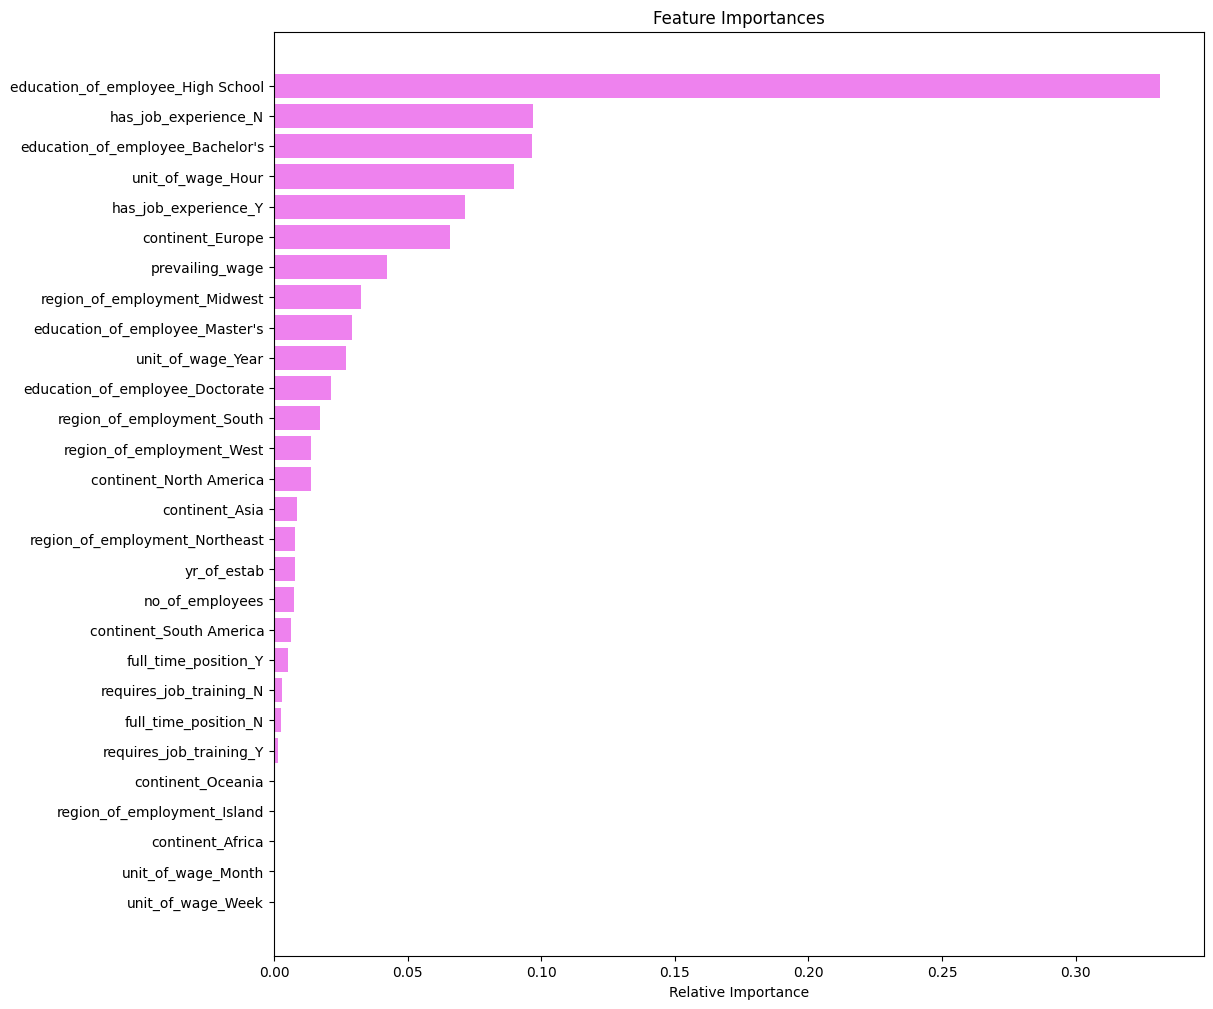

In [198]:
# Visualizing the feature importances of the Tuned Gradient Boost Classifier model as a horizontal bar chart.
feature_names = X_train.columns
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Education of employee is the most important fetature discovered, folowed by job expiriance and units of wage.

## Actionable Insights and Recommendations

#### Based on our analysis, several key insights have emerged regarding visa certification for applicants:
* Applicants with higher levels of education are more likely to have their visas certified.
* Candidates with job experience have a greater likelihood of visa certification.
*  Applicants who receive wage offers in hourly units are less likely to have their visa certified compared to those with annual, monthly, or weekly wage offers.
* Employees from Europe have the highest chances of visa certification, while those from South America have the lowest.
* The median wage of employees is approximately $70,000.
* About 67% of employees are from Asia.
* Approximately 66.8% of applicants have their visas certified.
* Employees with working regions in the South or Midwest have higher chances of obtaining visa.

#### Recommendations
* Companies should prioritize candidates with higher educational qualifications when sourcing international talent, as this is positively correlated with visa certification success.
* Organizations should look for candidates with relevant job experience, as this significantly improves the likelihood of visa certification.
* Companies should consider offering salaries in annual, monthly, or weekly formats rather than hourly, to enhance the chances of visa approval for their candidates.
* Given the higher certification rates among European applicants, companies might focus their recruitment efforts in this region to optimize visa certification outcomes.
* With a significant portion of the workforce from Asia, companies should continue to engage with this demographic, while ensuring their application processes are efficient.
*  Organizations hiring employees in the South or Midwest should be aware of the higher chances of visa certification in these regions and plan their recruitment strategies accordingly.